# ATMS 523 deffip2 - MODULE 1 PART 2 
## Surface Hydrology - Budyko Curve 

### Objective

This script visualizes the relationship between actual evaporation ratio (E/P) and the aridity index (Ep/P) for 12 U.S. states. The scatter points from data are compared against several theoretical and empirical Budyko-style curves. \
Inspired from CEE405 - Surface Hydrology class

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Data used for the calculation 
states = ["AZ", "GA", "WV", "OR", "IA", "NH", "TX", "KS", "NY", "VA", "FL", "WA"]

# Precipitation (precip), actual evaporation (actual_ev), potential evaporation (pot_ev))
precip = np.array([500, 1441, 952, 1057, 780, 1401, 788, 760, 1184, 960, 1285, 1882], dtype=float)
actual_ev = np.array([419, 827, 563, 547, 604, 529, 715, 666, 523, 591, 1039, 624], dtype=float)
pot_ev = np.array([1147, 866, 716, 850, 998, 708, 1511, 1350, 663, 773, 1214, 659], dtype=float)


Two ratios are computed using formulas: \
Evaporation ratio: \
$\frac{\text{Actual Evaporation}}{\text{Precipitation}}$

Aridity index: \
$\frac{\text{Potential Evaporation}}{\text{Precipitation}}$


In [5]:
# Evaporation ratio
ev_ratio = actual_ev / precip

# Aridity index
arid_idx = pot_ev / precip

In [6]:
# X-domain for continuous curves
xaxis_min, xaxis_max = 0.1, 2.5
xaxis = np.linspace(xaxis_min, max(arid_idx.max(), xaxis_max), 300)

### Curves on the plot

1. Energy-limited boundary: \
In form of diagonal straight line, indicates that evaporation is constrained by available energy \
$ \frac{\text{Actual Evaporation}}{\text{Precipitation}} = \frac{\text{Potential Evaporation}}{\text{Precipitation}} $

2. Water-limited boundary: \
In form of horixontal straight line, indicates that evaporation cannot exceed precipitation \
$\frac{\text{Actual Evaporation}}{\text{Precipitation}} = 1 $

3. Budyko formula: \
$ \frac{\text{Actual Evaporation}}{\text{Precipitation}} = \sqrt{ \frac{\text{Potential Evaporation}}{\text{Precipitation}} \cdot \left( 1 - e^{-\frac{\text{Potential Evaporation}}{\text{Precipitation}}} \right) \cdot \tanh\!\left( \frac{\text{Precipitation}}{\text{Potential Evaporation}} \right) } $



In [ ]:
# Energy-limited boundary
energy_limited = xaxis

# Budyko formula
budyko_original = np.sqrt(xaxis * (1.0 - np.exp(-xaxis)) * np.tanh(1.0 / xaxis))

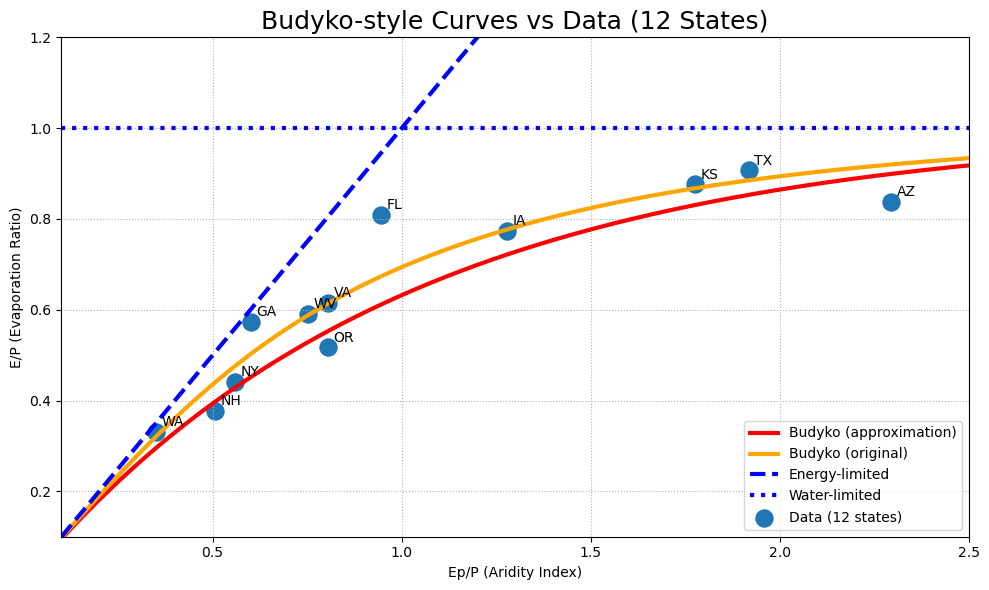

In [ ]:
plt.figure(figsize=(10, 6))

# Curves on plot
plt.plot(xaxis, budyko_original, linewidth=3, linestyle="-", color ="orange", label="Budyko (original)")
plt.plot(xaxis, energy_limited, linewidth=3, linestyle="--", color ="b", label="Energy-limited")
# Water-limited boundary: E/P = 1 or y axis = 1
plt.axhline(y=1.0, linewidth=3, linestyle=":", color ="b", label="Water-limited")


# Scatter plot of aridity index for all states
plt.scatter(arid_idx, ev_ratio, s=150, label="Data (12 states)")
# Annotate each state near its point
for name, x_val, y_val in zip(states, arid_idx, ev_ratio):
    plt.annotate(name, (x_val, y_val), xytext=(4, 4), textcoords="offset points")

#plot
plt.xlabel("Ep/P (Aridity Index)")
plt.ylabel("E/P (Evaporation Ratio)")
plt.title("Budyko Curve and Observation Data", fontsize=18)
plt.xlim(xaxis_min, xaxis_max)
plt.ylim(0.1, 1.2)
plt.grid(True, which="both", linestyle=":")
plt.legend(loc="best")
plt.tight_layout()
plt.show()